In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
# read the data from the Excel file
df = pd.read_excel("RealEstData05132023.xlsx")

In [6]:
df.head()

,OWNER1,OWNER2,Mailing_address1,Mailing_Address2,Mailing_Address3,REAL_ESTATE_ID,CARD_NUMBER,NUMBER_OF_CARDS,Street_Number,Street_Prefix,...,Land_Deferred_code,Land_Deferred_Amount,Historic_Deferred_code,Historic_Deferred_Amount,RECYCLED_UNITS,Disq_and_Qual_flag,Land_Disq_and_Qual_flag,TYPE_AND_USE,PHYSICAL_CITY,PHYSICAL_ZIP_CODE
0,NORTHGATE PROPERTIES LLC,NaN,8465 LENTIC CT,RALEIGH NC 27615-4964,NaN,1,1,1,1506,NaN,...,NaN,0,NaN,0,0,NaN,NaN,NaN,RALEIGH,27604.0
1,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,1,2,6012,NaN,...,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0
2,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,2,2,6012,NaN,...,NaN,0,NaN,0,0,A,NaN,34.0,RALEIGH,27617.0
3,HARRISPARK PROPERTIES INC,NaN,608 GASTON ST STE 200,RALEIGH NC 27603-1258,NaN,4,1,1,1601,NaN,...,NaN,0,NaN,0,0,T,NaN,85.0,RALEIGH,27604.0
4,"MOGHADASS, INC",NaN,1532 PROVIDENCE RD S STE 230,WAXHAW NC 28173-8313,NaN,5,1,1,1831,NaN,...,NaN,0,NaN,0,0,A,NaN,200.0,RALEIGH,27604.0


In [11]:
# looking at the data types
print(df.dtypes)


OWNER1                      object
OWNER2                      object
Mailing_address1            object
Mailing_Address2            object
Mailing_Address3            object
                            ...   
Disq_and_Qual_flag          object
Land_Disq_and_Qual_flag     object
TYPE_AND_USE               float64
PHYSICAL_CITY               object
PHYSICAL_ZIP_CODE          float64
Length: 87, dtype: object


In [12]:
# check for null values
print(df.isnull().sum())


OWNER1                          0
OWNER2                     359944
Mailing_address1                0
Mailing_Address2               14
Mailing_Address3           414218
                            ...  
Disq_and_Qual_flag          82832
Land_Disq_and_Qual_flag    281472
TYPE_AND_USE                54016
PHYSICAL_CITY                2431
PHYSICAL_ZIP_CODE            4290
Length: 87, dtype: int64


In [25]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [26]:
duplicate_columns = df.duplicated()
print("Number of duplicate columns:", duplicate_columns.sum())

Number of duplicate columns: 0


###  use visualization technique to check for outliers in the data

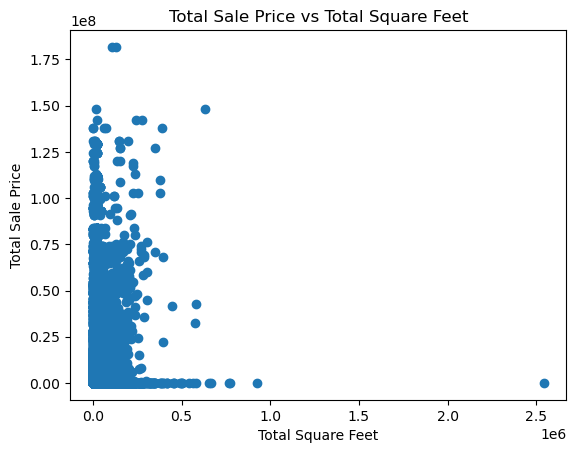

In [38]:
plt.scatter(df['HEATED_AREA'], df['Total_sale_Price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Total Sale Price')
plt.title('Total Sale Price vs Total Square Feet')
plt.show()


In [39]:
#  determine the most common zoning type for properties 
zoning_counts = df['Zoning'].value_counts()
print(zoning_counts)

R-4         50102
R-6         43261
R-10        35397
R-30        25275
R-40W       22033
            ...  
O&I-3           1
R&PUD-CZ        1
C-MS            1
OP              1
HB-SUD          1
Name: Zoning, Length: 363, dtype: int64


In [40]:
most_common_zoning = zoning_counts.idxmax()
print(most_common_zoning)

R-4


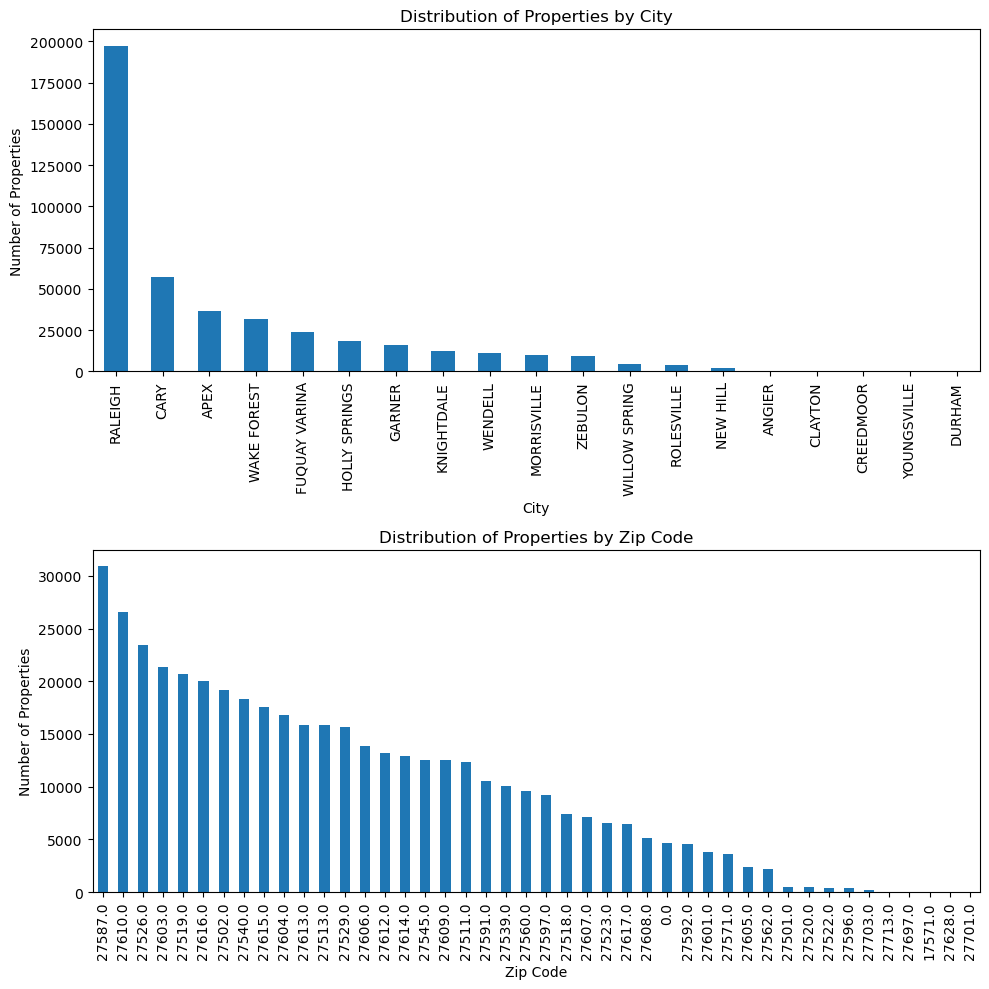

In [41]:
# Group the data by city and zip code and count the number of properties in each group
city_counts = df.groupby('PHYSICAL_CITY')['REAL_ESTATE_ID'].count().sort_values(ascending=False)
zipcode_counts = df.groupby('PHYSICAL_ZIP_CODE')['REAL_ESTATE_ID'].count().sort_values(ascending=False)

# Plot the data using a bar chart
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
city_counts.plot(kind='bar', ax=axs[0])
zipcode_counts.plot(kind='bar', ax=axs[1])
axs[0].set_title('Distribution of Properties by City')
axs[1].set_title('Distribution of Properties by Zip Code')
axs[0].set_xlabel('City')
axs[1].set_xlabel('Zip Code')
axs[0].set_ylabel('Number of Properties')
axs[1].set_ylabel('Number of Properties')
plt.tight_layout()
plt.show()

###### for the below code: The first part shows the correlation between the number of rooms in a property and its assessed value. 
###### The second part of the code calculates the frequency of each design style with most common style

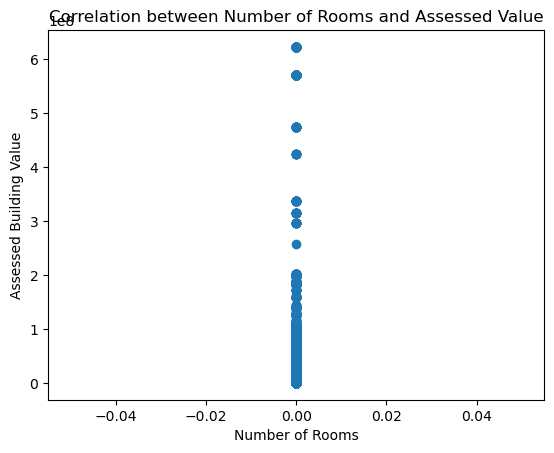

The most common design style is: A


In [42]:
# Correlation between number of rooms and assessed value
plt.scatter(df['NUM_of_Rooms'], df['Assessed_Building_Value'])
plt.xlabel('Number of Rooms')
plt.ylabel('Assessed Building Value')
plt.title('Correlation between Number of Rooms and Assessed Value')
plt.show()

# Most common design style
design_style_counts = df['DESIGN_STYLE'].value_counts()
most_common_design_style = design_style_counts.index[0]
print('The most common design style is:', most_common_design_style)

In [47]:
# average house sale price per square foot of property
df['Price_Per_Sqft'] = df['Total_sale_Price'] / df['HEATED_AREA']
avg_price_per_sqft = df['Price_Per_Sqft'].mean()
print('The average sale price per square foot is:', avg_price_per_sqft)



The average sale price per square foot is: inf


In [48]:
# calculate correlation coefficient between age and assessed value
corr_coeff = df['Year_Built'].corr(df['Assessed_Building_Value'])

print('The correlation coefficient between age and assessed value is:', corr_coeff)


The correlation coefficient between age and assessed value is: 0.03193705249127061


In [50]:
# check the average size of home over time
avg_area_by_year = df.groupby('Year_Built')['HEATED_AREA'].mean()
print(avg_area_by_year)



Year_Built
0         17.849687
1760    1512.000000
1779    1060.000000
1785    3863.000000
1790    2305.000000
           ...     
2020    4022.932216
2021    3542.756069
2022    3813.470362
2023     924.434706
2024    2918.000000
Name: HEATED_AREA, Length: 194, dtype: float64


In [57]:
# Filter sales in the last 10 years
recent_sales = df[df['Total_Sale_Date'].dt.year >= 2013]

# Get the top 10 zip codes with the most sales
top_zipcodes = recent_sales['PHYSICAL_ZIP_CODE'].value_counts().head(10)

# Get the top 10 cities with the most sales
top_cities = recent_sales['CITY'].value_counts().head(10)

print('Top 10 zip codes with the most sales in the last 10 years:\n', top_zipcodes)
print('\nTop 10 cities with the most sales in the last 10 years:\n', top_cities)


Top 10 zip codes with the most sales in the last 10 years:
 27587.0    15954
27526.0    13387
27519.0    12145
27610.0    11334
27502.0    11125
27540.0    10831
27616.0    10686
27603.0     9062
27604.0     7693
27615.0     7655
Name: PHYSICAL_ZIP_CODE, dtype: int64

Top 10 cities with the most sales in the last 10 years:
 RAL    73483
CAR    29281
APE    17047
FUQ    12279
WAK    11282
HOL    10689
GAR     6631
MOR     4582
KNI     3768
WEN     3438
Name: CITY, dtype: int64


### to predict the house price we'll use linear regression model